In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data = pd.read_excel("Wifi-localization.xlsx")

In [3]:
raw_data.head()

,Wifi_1,Wifi_2,Wifi_3,Wifi_4,Wifi_5,Wifi_6,Wifi_7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Wifi_1  2000 non-null   int64
 1   Wifi_2  2000 non-null   int64
 2   Wifi_3  2000 non-null   int64
 3   Wifi_4  2000 non-null   int64
 4   Wifi_5  2000 non-null   int64
 5   Wifi_6  2000 non-null   int64
 6   Wifi_7  2000 non-null   int64
 7   Room    2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [5]:
data = raw_data.copy()

In [6]:
data = data.sample(frac= 1, random_state= 1, ignore_index= True)
data.head()

,Wifi_1,Wifi_2,Wifi_3,Wifi_4,Wifi_5,Wifi_6,Wifi_7,Room
0,-39,-56,-53,-49,-70,-80,-75,2
1,-62,-58,-49,-64,-42,-86,-89,4
2,-53,-53,-50,-55,-59,-86,-81,3
3,-47,-57,-57,-52,-62,-86,-84,3
4,-49,-59,-57,-50,-72,-80,-91,3


Text(0.5, 0, 'Room')

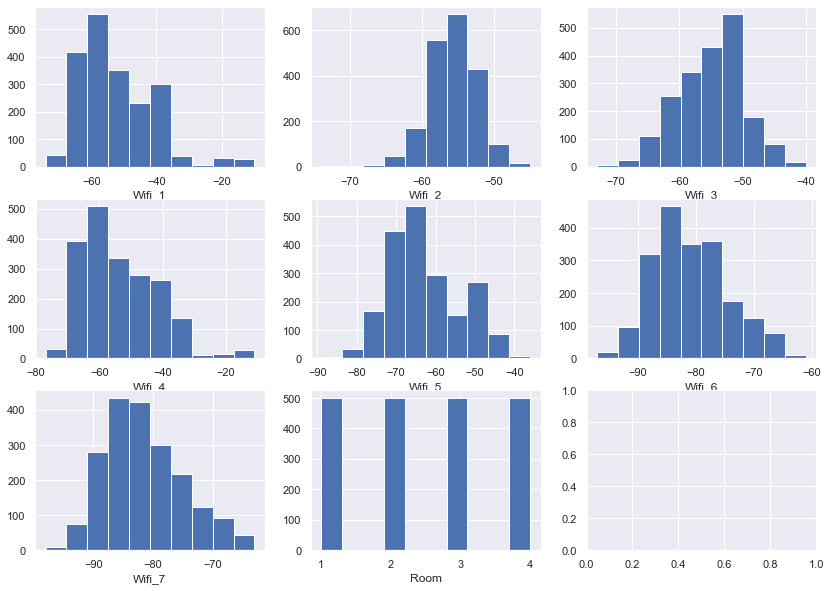

In [7]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize= (14,10))

ax1.hist(data["Wifi_1"])
ax1.set_xlabel("Wifi_1")

ax2.hist(data["Wifi_2"])
ax2.set_xlabel("Wifi_2")

ax3.hist(data["Wifi_3"] )
ax3.set_xlabel("Wifi_3")

ax4.hist(data["Wifi_4"])
ax4.set_xlabel("Wifi_4")

ax5.hist(data["Wifi_5"])
ax5.set_xlabel("Wifi_5")

ax6.hist(data["Wifi_6"])
ax6.set_xlabel("Wifi_6")

ax7.hist(data["Wifi_7"])
ax7.set_xlabel("Wifi_7")

ax8.hist(data["Room"])
ax8.set_xlabel("Room")

# Ml Models

In [8]:
x = data.drop("Room" , axis= 1)
y = data["Room"]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 1)

In [10]:
from sklearn.naive_bayes import GaussianNB
clf_gn = GaussianNB()
clf_gn.fit(x_train, y_train)
clf_gn.score(x_test, y_test)

0.9783333333333334

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train, y_train)
clf_dt.score(x_test, y_test)

0.9666666666666667

In [12]:
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(x_train, y_train)
clf_svc.score(x_test, y_test)

0.98

In [13]:
from sklearn.ensemble import AdaBoostClassifier
clf_adb = AdaBoostClassifier()
clf_adb.fit(x_train, y_train)
clf_adb.score(x_test, y_test)

0.755

In [14]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(x_train, y_train)
clf_rf.score(x_test, y_test)

0.98

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf_kn = KNeighborsClassifier()
clf_kn.fit(x_train, y_train)
clf_kn.score(x_test, y_test)

0.98

In [16]:
from sklearn.model_selection import GridSearchCV

clf_sub = [clf_gn, clf_dt, clf_svc, clf_adb, clf_rf, clf_kn]

parameters_gn ={}
parameters_dt ={}
parameters_svc = {'kernel':('linear', 'rbf' ,'sigmoid'), 'C':[0.1, 1, 10], 'gamma' : [0.0001, 0.001, 0.01, 1] }
parameters_adb = {'n_estimators':[30,50], 'learning_rate':[0.7, 1]}
parameters_rf = {'n_estimators':[50,100, 150]}
parameters_kn = { 'n_neighbors': [5, 10, 15] }

parameters = [parameters_gn, parameters_dt, parameters_svc, parameters_adb, parameters_rf, parameters_kn]

params = []
score = []


for i in range(6):
    clf = GridSearchCV(clf_sub[i], parameters[i], refit= True)
    clf.fit(x_train, y_train)
    params.append(clf.best_params_)
    score.append(clf.score(x_test, y_test))
    
keys = ["GNB", "DTREE", "SVC", "ADABO", "RF", "KNN"]

accuracy_score_dict = dict(zip(keys, score))

print(params)  
accuracy_score_dict

[{}, {}, {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}, {'learning_rate': 0.7, 'n_estimators': 50}, {'n_estimators': 50}, {'n_neighbors': 10}]


{'GNB': 0.9783333333333334,
 'DTREE': 0.97,
 'SVC': 0.9816666666666667,
 'ADABO': 0.8133333333333334,
 'RF': 0.9816666666666667,
 'KNN': 0.9816666666666667}

In [17]:
#Evaluation Metrics for randomforest (best score = 98%)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf_metrix = confusion_matrix(y_test,clf_rf.predict(x_test))
class_report = classification_report(y_test,clf_rf.predict(x_test))

print(class_report)

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       173
           2       0.98      0.96      0.97       146
           3       0.95      0.96      0.96       141
           4       0.99      1.00      1.00       140

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



# Clustering

In [18]:
x = data.drop("Room" , axis=1)

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 4, n_init=20, random_state= 1)
kmeans.fit(x)

KMeans(n_clusters=4, n_init=20, random_state=1)

In [20]:
kmeans.labels_

array([3, 0, 3, ..., 0, 2, 3])

In [21]:
kmeans.inertia_

246771.58951142075

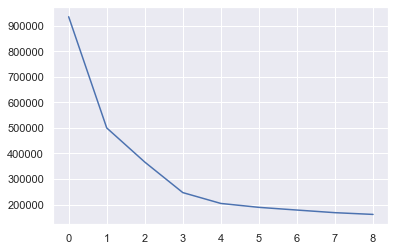

In [22]:
wcss = []

for i in range(1,10):
    kmeans_i = KMeans(n_clusters= i, n_init=20, random_state= 1)
    kmeans_i.fit(x)
    wcss.append(kmeans_i.inertia_)
    
plt.plot(wcss)    

<AxesSubplot:>

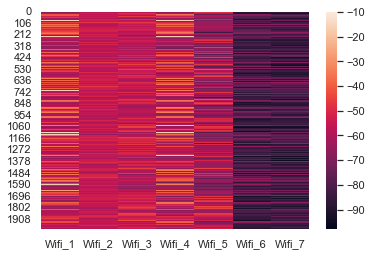

In [23]:
sns.heatmap(x)

<AxesSubplot:xlabel='Wifi_1', ylabel='Wifi_4'>

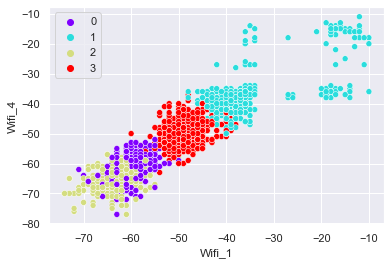

In [24]:
sns.scatterplot(x= data["Wifi_1"], y= data["Wifi_4"], hue=kmeans.labels_ , palette="rainbow")

<AxesSubplot:xlabel='Wifi_1', ylabel='Wifi_4'>

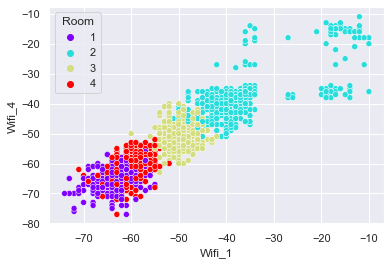

In [25]:
sns.scatterplot(x= data["Wifi_1"], y= data["Wifi_4"], hue=data["Room"] , palette="rainbow")

<AxesSubplot:xlabel='Wifi_5', ylabel='Wifi_4'>

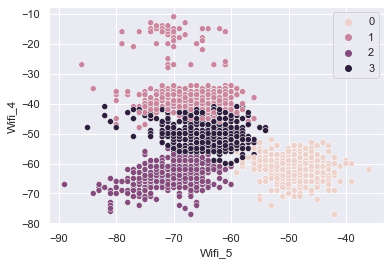

In [31]:
sns.scatterplot(x= data["Wifi_5"], y= data["Wifi_4"], hue=kmeans.labels_)

<AxesSubplot:xlabel='Wifi_5', ylabel='Wifi_4'>

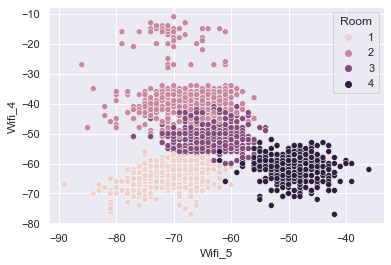

In [30]:
sns.scatterplot(x= data["Wifi_5"], y= data["Wifi_4"], hue=data["Room"])

<AxesSubplot:xlabel='Wifi_5', ylabel='Wifi_1'>

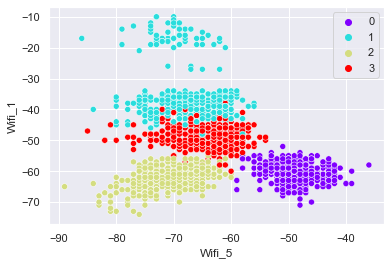

In [28]:
sns.scatterplot(x= data["Wifi_5"], y= data["Wifi_1"], hue=kmeans.labels_, palette= "rainbow")


<AxesSubplot:xlabel='Wifi_5', ylabel='Wifi_1'>

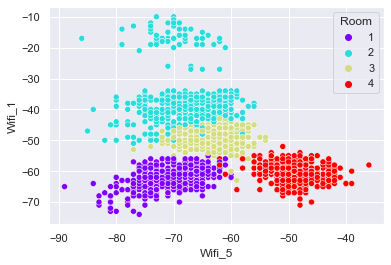

In [29]:
sns.scatterplot(x= data["Wifi_5"], y= data["Wifi_1"], hue=data["Room"], palette= "rainbow")